#            Titanic: Machine Leaning from Disaster

In [1]:
# Data analysis and Visulization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
from collections import Counter

# machine learning

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# load train & test data from csv files 
train_data = pd.read_csv("C:/Users/Lenovo/Desktop/train.csv")
test_data= pd.read_csv("C:/Users/Lenovo/Desktop/test.csv")

# 1. Exploratory Data Analysis (EDA)

In [3]:
# preview train data
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# preview test data
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
print(train_data.shape,test_data.shape)

(891, 12) (418, 11)


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
# combining the train and test data
combine_data = pd.concat((train_data,test_data),axis = 0).reset_index(drop=True)
combine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [12]:
combine_data.head()


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [13]:
# Checking Categorical Data
train_data.select_dtypes(include=['object']).columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [14]:
# Checking Numerical Data
train_data.select_dtypes(include=['int64','float64']).columns 

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [15]:
combine_data.Sex.value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [16]:
combine_data.Pclass.value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

In [17]:
combine_data.Survived.value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

# Analyze by visualizing variables with bar plot, histogram and scatter plot

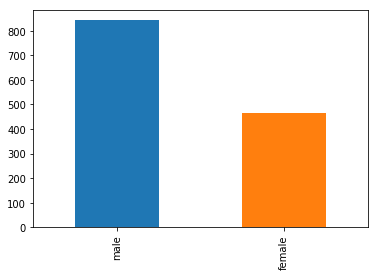

In [18]:
# Visualize variables with bar plot
combine_data.Sex.value_counts().plot(kind='bar')

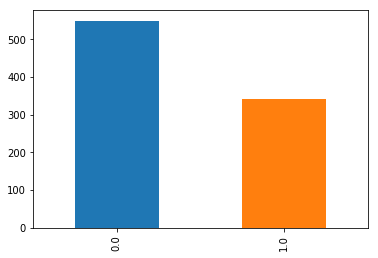

In [19]:
combine_data.Survived.value_counts().plot(kind='bar')

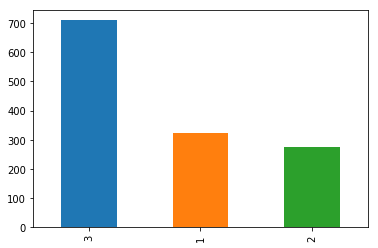

In [20]:
combine_data.Pclass.value_counts().plot(kind='bar')

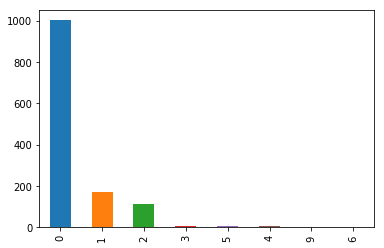

In [21]:
combine_data.Parch.value_counts().plot(kind='bar')

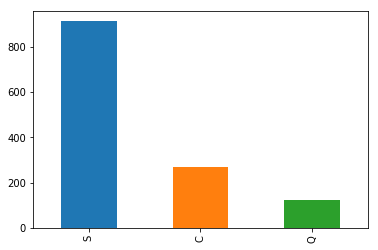

In [22]:
combine_data.Embarked.value_counts().plot(kind='bar')

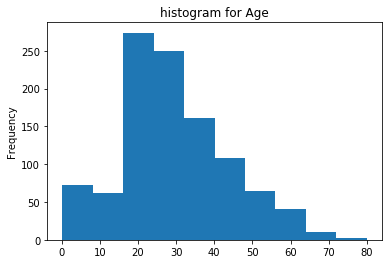

In [23]:
# visualize variables with histogram
combine_data.Age.plot(kind ='hist',title = 'histogram for Age' )

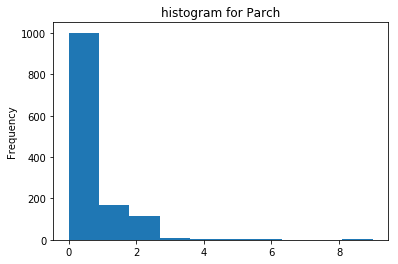

In [24]:
combine_data.Parch.plot(kind ='hist',title = 'histogram for Parch' )

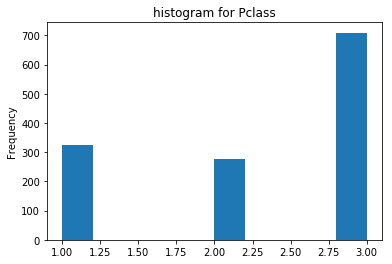

In [25]:
combine_data.Pclass.plot(kind ='hist',title = 'histogram for Pclass' )

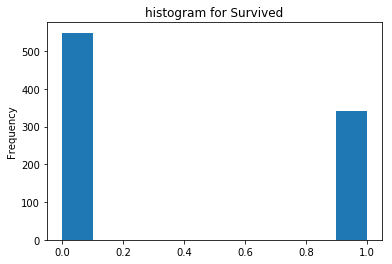

In [26]:
combine_data.Survived.plot(kind ='hist',title = 'histogram for Survived' )

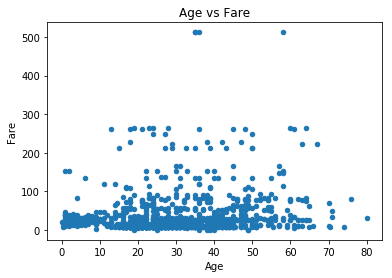

In [27]:
# visulize variables with scatter plot
combine_data.plot.scatter(x='Age',y='Fare',title='Age vs Fare')

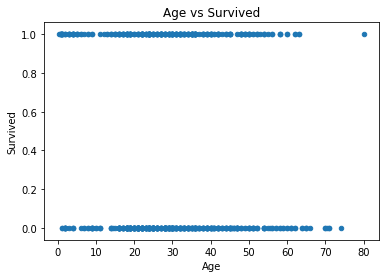

In [28]:
combine_data.plot.scatter(x='Age',y='Survived',title='Age vs Survived')

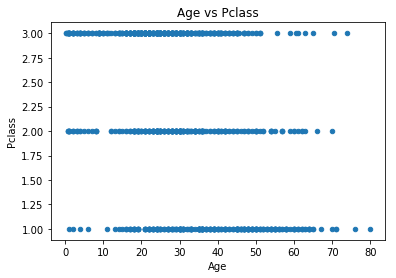

In [29]:
combine_data.plot.scatter(x='Age',y='Pclass',title='Age vs Pclass')

# Analyze by pivoting features
- we can  analyze our feature correlations by pivoting features.


In [30]:
combine_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [31]:
combine_data[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [32]:
combine_data[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [33]:
combine_data[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000
7,9,NaN


# correlation matrix

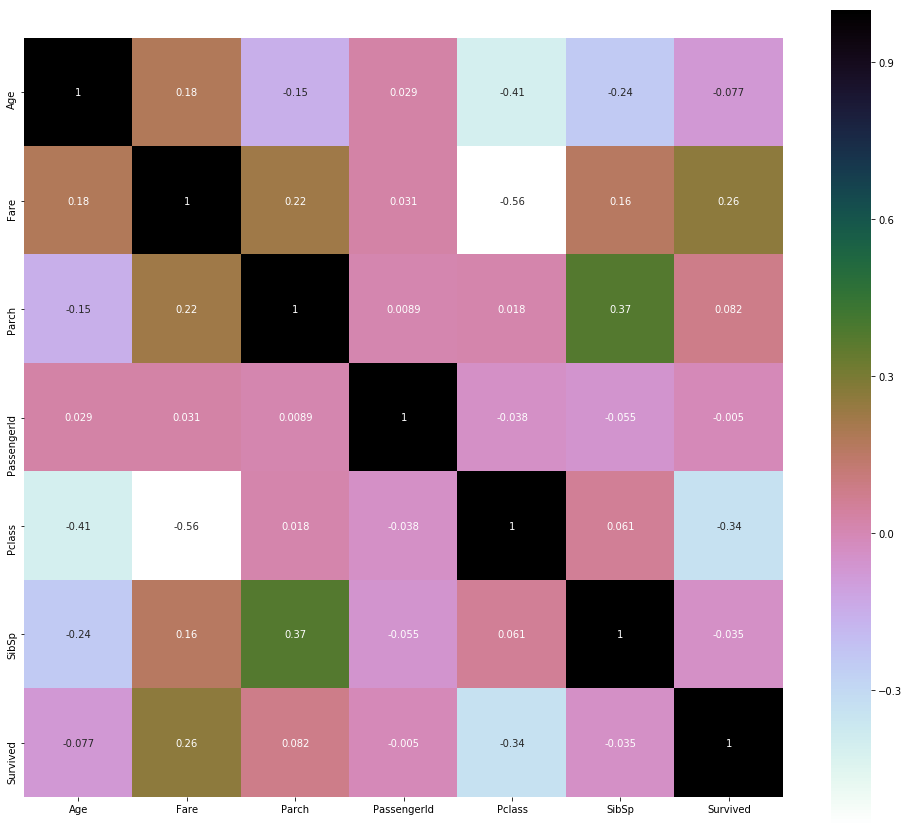

In [34]:
#plotting the correlation matrix of all Numerical features
plt.figure(figsize=(17,15))
sns.heatmap(combine_data.corr(), annot=True, cmap='cubehelix_r',square=True) 
plt.show()

In [35]:
combine_data_corr = combine_data.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
combine_data_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
combine_data_corr[combine_data_corr['Feature 1'] == 'Age']

,Feature 1,Feature 2,Correlation Coefficient
6,Age,Age,1.000000
9,Age,Pclass,0.408106
17,Age,SibSp,0.243699
22,Age,Fare,0.178740
25,Age,Parch,0.150917
29,Age,Survived,0.077221
41,Age,PassengerId,0.028814


In [36]:
combine_data[combine_data.Age.isnull()].head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
17,NaN,NaN,S,13.0000,"Williams, Mr. Charles Eugene",0,18,2,male,0,1.0,244373
19,NaN,NaN,C,7.2250,"Masselmani, Mrs. Fatima",0,20,3,female,0,1.0,2649
26,NaN,NaN,C,7.2250,"Emir, Mr. Farred Chehab",0,27,3,male,0,0.0,2631
28,NaN,NaN,Q,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,29,3,female,0,1.0,330959


# Dealing with  missing values in  variables

In [37]:
# finding missing values

Train_data_missing = train_data.isnull().sum()
print("training data:",sep="Train_data_missing")
print(Train_data_missing)
print('\n')
Test_data_missing = test_data.isnull().sum()
print("testing data:",sep="Test_data_missing")
print(Test_data_missing)
print('\n')
Combine_data_missing = combine_data.isnull().sum()
print("combining data:",sep="Combine_data_missing")
print(Combine_data_missing)

training data:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


testing data:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


combining data:
Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64


#  Age 
- we are filling missing values using median method.Median age of Pclass groups is the best choice because
of its high correlation with Age. for better accuracy we can group with 'Sex' variable


In [38]:
# Filling  missing values in Age column with the medians of Sex and Pclass groups
combine_data['Age'] = combine_data.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))
combine_data['Age'].head(10)


0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    25.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [39]:
combine_data['Age'].isnull().sum()

0

 # Fare
 -  only one passenger who has missed Fare value.   
    - 

In [40]:
combine_data[combine_data.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1043,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


In [41]:
med_fare = combine_data.loc[(combine_data.Pclass == 3) & (combine_data.Embarked=='S'),'Fare'].median()
print (med_fare)
# Filling  missing values in Fare column with the medians Fare
combine_data['Fare'] = combine_data['Fare'].fillna(med_fare)

8.05


In [42]:
combine_data['Fare'].isnull().sum()

0

# Embarked 
-  Embarked is a categorical variable and only 2 missing values in the whole dataset.

In [43]:
combine_data[combine_data.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572


In [44]:
# number of people embarked at a particular points
combine_data.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [45]:
pd.crosstab(combine_data[combine_data.Survived != -888].Survived,combine_data[combine_data.Survived != -888].Embarked)

Embarked,C,Q,S
Survived,,,
0.0,75,47,427
1.0,93,30,217


In [46]:
# Filling missing values in Embarked columns with S
combine_data['Embarked'] = combine_data['Embarked'].fillna('S')

In [47]:
combine_data['Embarked'].isnull().sum()

0

# Cabin

In [48]:
combine_data["Cabin"].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [49]:
combine_data["Cabin"].describe()

count             295
unique            186
top       C23 C25 C27
freq                6
Name: Cabin, dtype: object

In [50]:
combine_data["Cabin"].isnull().sum()

1014

In [51]:
# Replace the missing Cabin number by  'X' if not
combine_data["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in combine_data['Cabin'] ])

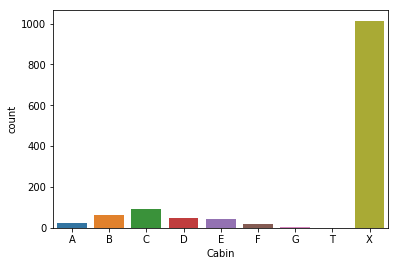

In [52]:
g = sns.countplot(combine_data["Cabin"],order=['A','B','C','D','E','F','G','T','X'])

C:\Users\Lenovo\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


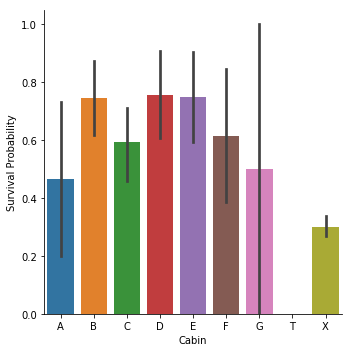

In [53]:
g = sns.factorplot(y="Survived",x="Cabin",data=combine_data,kind="bar",order=['A','B','C','D','E','F','G','T','X'])
g = g.set_ylabels("Survival Probability")

In [54]:
# Dropping the Cabin feature because of 80% missing values
combine_data.drop(['Cabin'], inplace=True, axis=1)

In [55]:
combine_data.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


# 2. Feature Engineering

**Feature: Age state(child or adult)**

In [56]:
# we can convert age in the two category Adult(if age>18) otherwise Child
combine_data['AgeState'] = np.where(combine_data['Age']>=18,'Adult','Child')
combine_data['AgeState'].value_counts()

Adult    1155
Child     154
Name: AgeState, dtype: int64

In [57]:
pd.crosstab(combine_data[combine_data.Survived != -88].Survived , combine_data[combine_data.Survived != -88].AgeState)

AgeState,Adult,Child
Survived,,
0.0,497,52
1.0,281,61


**Feature:Title from Name**

In [58]:
#  convert name variable in Title
combine_data_title = [i.split(",")[1].split(".")[0].strip() for i in combine_data['Name']]
combine_data['Title'] = pd.Series(combine_data_title)
combine_data['Title'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

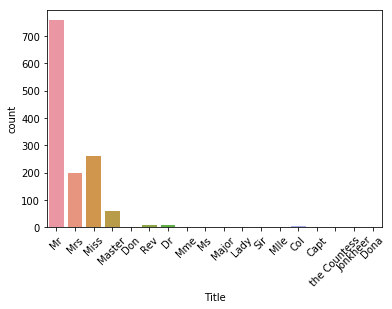

In [59]:
g = sns.countplot(x="Title",data=combine_data)
g = plt.setp(g.get_xticklabels(), rotation=45) 

In [60]:
# We can replace many titles with a more common name such as Rare
combine_data['Title'] = combine_data['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
combine_data['Title'] = combine_data['Title'].replace('Mlle', 'Miss')
combine_data['Title'] = combine_data['Title'].replace('Ms', 'Miss')
combine_data['Title'] = combine_data['Title'].replace('Mme', 'Mrs')
    
combine_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.318182
5,the Countess,1.000000


C:\Users\Lenovo\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


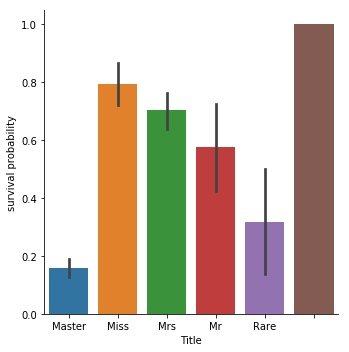

In [61]:
g = sns.factorplot(x="Title",y="Survived",data=combine_data,kind="bar")
g = g.set_xticklabels(["Master","Miss","Mrs","Mr","Rare"])
g = g.set_ylabels("survival probability")

In [62]:
# we can convert the categorical titles to integer.
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
combine_data['Title'] = combine_data['Title'].map(title_mapping)
combine_data['Title'] = combine_data['Title'].fillna(0)

combine_data.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,AgeState,Title
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Adult,1.0
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Adult,3.0
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Adult,2.0
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Adult,3.0
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Adult,1.0


In [63]:
# we need to drop Name feature from data and also no need to PassengerID
combine_data = combine_data.drop(['Name'], axis=1)

In [64]:
combine_data.head()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,AgeState,Title
0,22.0,S,7.2500,0,1,3,male,1,0.0,A/5 21171,Adult,1.0
1,38.0,C,71.2833,0,2,1,female,1,1.0,PC 17599,Adult,3.0
2,26.0,S,7.9250,0,3,3,female,0,1.0,STON/O2. 3101282,Adult,2.0
3,35.0,S,53.1000,0,4,1,female,1,1.0,113803,Adult,3.0
4,35.0,S,8.0500,0,5,3,male,0,0.0,373450,Adult,1.0


**Feature:Sex**

C:\Users\Lenovo\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


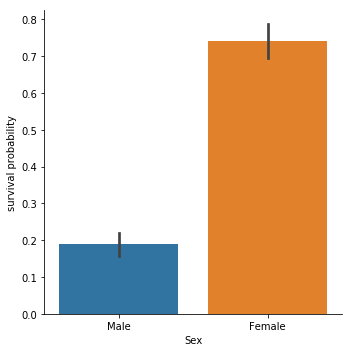

In [65]:
g = sns.factorplot(x="Sex",y="Survived",data=combine_data,kind="bar")
g = g.set_xticklabels(["Male","Female"])
g = g.set_ylabels("survival probability")

In [66]:
# convert Sex feature into categorical value 0 for male and 1 for female
combine_data["Sex"] = combine_data["Sex"].map({"male": 0, "female":1})

In [67]:
combine_data.head()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,AgeState,Title
0,22.0,S,7.2500,0,1,3,0,1,0.0,A/5 21171,Adult,1.0
1,38.0,C,71.2833,0,2,1,1,1,1.0,PC 17599,Adult,3.0
2,26.0,S,7.9250,0,3,3,1,0,1.0,STON/O2. 3101282,Adult,2.0
3,35.0,S,53.1000,0,4,1,1,1,1.0,113803,Adult,3.0
4,35.0,S,8.0500,0,5,3,0,0,0.0,373450,Adult,1.0


In [68]:
# we can also drop Ticket variable
combine_data = combine_data.drop(['Ticket'], axis=1)

In [69]:
combine_data.head()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,AgeState,Title
0,22.0,S,7.2500,0,1,3,0,1,0.0,Adult,1.0
1,38.0,C,71.2833,0,2,1,1,1,1.0,Adult,3.0
2,26.0,S,7.9250,0,3,3,1,0,1.0,Adult,2.0
3,35.0,S,53.1000,0,4,1,1,1,1.0,Adult,3.0
4,35.0,S,8.0500,0,5,3,0,0,0.0,Adult,1.0


In [70]:
# we can create Age bands accourding to our choice
combine_data.loc[ combine_data['Age'] < 18, 'Age'] = 0
combine_data.loc[(combine_data['Age'] >= 18) & (combine_data['Age'] <36), 'Age'] = 1
combine_data.loc[(combine_data['Age'] >= 36) & (combine_data['Age'] < 54), 'Age'] = 2
combine_data.loc[(combine_data['Age'] >= 54) & (combine_data['Age'] < 72), 'Age'] = 3
combine_data.loc[ combine_data['Age'] >= 72, 'Age']
combine_data.head()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,AgeState,Title
0,1.0,S,7.2500,0,1,3,0,1,0.0,Adult,1.0
1,2.0,C,71.2833,0,2,1,1,1,1.0,Adult,3.0
2,1.0,S,7.9250,0,3,3,1,0,1.0,Adult,2.0
3,1.0,S,53.1000,0,4,1,1,1,1.0,Adult,3.0
4,1.0,S,8.0500,0,5,3,0,0,0.0,Adult,1.0


**Embarked**

C:\Users\Lenovo\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


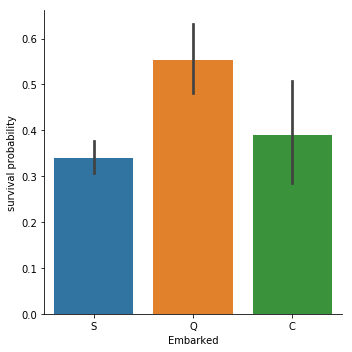

In [71]:
g = sns.factorplot(x="Embarked",y="Survived",data=combine_data,kind="bar")
g = g.set_xticklabels(["S","Q","C"])
g = g.set_ylabels("survival probability")

In [72]:
# we can convert categorical feature to integer
embarked_mapping = {"S": 0 , "C": 1, "Q": 2 }
combine_data['Embarked'] = combine_data['Embarked'].map(embarked_mapping)



In [73]:
combine_data.head()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,AgeState,Title
0,1.0,0,7.2500,0,1,3,0,1,0.0,Adult,1.0
1,2.0,1,71.2833,0,2,1,1,1,1.0,Adult,3.0
2,1.0,0,7.9250,0,3,3,1,0,1.0,Adult,2.0
3,1.0,0,53.1000,0,4,1,1,1,1.0,Adult,3.0
4,1.0,0,8.0500,0,5,3,0,0,0.0,Adult,1.0


**AgeState**

C:\Users\Lenovo\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


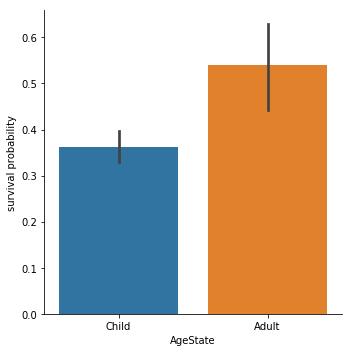

In [74]:
g = sns.factorplot(x="AgeState",y="Survived",data=combine_data,kind="bar")
g = g.set_xticklabels(["Child","Adult"])
g = g.set_ylabels("survival probability")

In [75]:
# we can convert categorical feature to integer
agestate_mapping = {'Child': 1, 'Adult': 2}
combine_data['AgeState'] =  combine_data['AgeState'].map(agestate_mapping)

In [76]:
combine_data.head()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,AgeState,Title
0,1.0,0,7.2500,0,1,3,0,1,0.0,2,1.0
1,2.0,1,71.2833,0,2,1,1,1,1.0,2,3.0
2,1.0,0,7.9250,0,3,3,1,0,1.0,2,2.0
3,1.0,0,53.1000,0,4,1,1,1,1.0,2,3.0
4,1.0,0,8.0500,0,5,3,0,0,0.0,2,1.0


In [77]:
# create Fare Bands
combine_data.loc[ combine_data['Fare'] <= 7.91, 'Fare'] = 0
combine_data.loc[(combine_data['Fare'] > 7.91) & (combine_data['Fare'] <= 14.454), 'Fare'] = 1
combine_data.loc[(combine_data['Fare'] > 14.454) & (combine_data['Fare'] <= 31), 'Fare']   = 2
combine_data.loc[ combine_data['Fare'] > 31, 'Fare'] = 3
# combine_data['Fare'] = combine_data['Fare'].astype(int)

In [78]:
combine_data.head()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,AgeState,Title
0,1.0,0,0.0,0,1,3,0,1,0.0,2,1.0
1,2.0,1,3.0,0,2,1,1,1,1.0,2,3.0
2,1.0,0,1.0,0,3,3,1,0,1.0,2,2.0
3,1.0,0,3.0,0,4,1,1,1,1.0,2,3.0
4,1.0,0,1.0,0,5,3,0,0,0.0,2,1.0


**Family Size**

In [79]:
#We can create a new feature from combination of  Parch and SibSp.

combine_data['FamilySize'] = combine_data['SibSp'] + combine_data['Parch'] + 1

combine_data[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


C:\Users\Lenovo\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


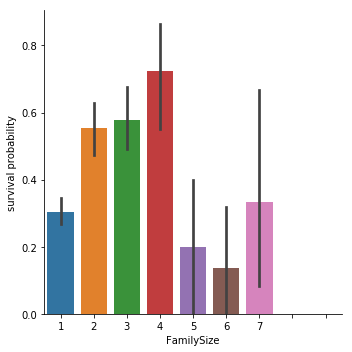

In [80]:
g = sns.factorplot(x="FamilySize",y="Survived",data=combine_data,kind="bar")
g = g.set_xticklabels([1, 2,3,4,5,6,7])
g = g.set_ylabels("survival probability")

In [81]:
# we can create another feature IsAlone from FamilySize
combine_data['IsAlone'] = 0
combine_data.loc[combine_data['FamilySize'] == 1, 'IsAlone'] = 1
combine_data[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


C:\Users\Lenovo\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


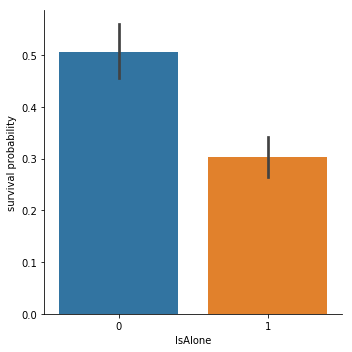

In [82]:
g = sns.factorplot(x="IsAlone",y="Survived",data=combine_data,kind="bar")
g = g.set_xticklabels(["0","1"])
g = g.set_ylabels("survival probability")

In [83]:
combine_data.head()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,AgeState,Title,FamilySize,IsAlone
0,1.0,0,0.0,0,1,3,0,1,0.0,2,1.0,2,0
1,2.0,1,3.0,0,2,1,1,1,1.0,2,3.0,2,0
2,1.0,0,1.0,0,3,3,1,0,1.0,2,2.0,1,1
3,1.0,0,3.0,0,4,1,1,1,1.0,2,3.0,2,0
4,1.0,0,1.0,0,5,3,0,0,0.0,2,1.0,1,1


In [84]:
# we need to drop Parch, SibSp, and FamilySize features in favor of IsAlone.
combine_data = combine_data.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)


In [85]:
combine_data.head()

,Age,Embarked,Fare,PassengerId,Pclass,Sex,Survived,AgeState,Title,IsAlone
0,1.0,0,0.0,1,3,0,0.0,2,1.0,0
1,2.0,1,3.0,2,1,1,1.0,2,3.0,0
2,1.0,0,1.0,3,3,1,1.0,2,2.0,1
3,1.0,0,3.0,4,1,1,1.0,2,3.0,0
4,1.0,0,1.0,5,3,0,0.0,2,1.0,1


In [86]:
combine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
Age            1309 non-null float64
Embarked       1309 non-null int64
Fare           1309 non-null float64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null int64
Survived       891 non-null float64
AgeState       1309 non-null int64
Title          1309 non-null float64
IsAlone        1309 non-null int64
dtypes: float64(4), int64(6)
memory usage: 102.3 KB


In [87]:
Combine_data_missing = combine_data.isnull().sum()
print("combining data:",sep="Combine_data_missing")
print(Combine_data_missing)

combining data:
Age              0
Embarked         0
Fare             0
PassengerId      0
Pclass           0
Sex              0
Survived       418
AgeState         0
Title            0
IsAlone          0
dtype: int64


# 3. Machine Learning Models
- we split combine data in train and test data. we need to remove response variable(Survived) from test data

In [88]:
# split combine data in train and test data
train_data = combine_data.loc[0:890,:]
test_data = combine_data.loc[891:,:]

In [89]:
train_data = train_data.astype(int)
train_data.head()

,Age,Embarked,Fare,PassengerId,Pclass,Sex,Survived,AgeState,Title,IsAlone
0,1,0,0,1,3,0,0,2,1,0
1,2,1,3,2,1,1,1,2,3,0
2,1,0,1,3,3,1,1,2,2,1
3,1,0,3,4,1,1,1,2,3,0
4,1,0,1,5,3,0,0,2,1,1


In [90]:
# Separate train data features 
train_data = train_data.drop(['PassengerId'],axis=1)
X_train = train_data.drop(labels = ['Survived'],axis = 1)
Y_train = train_data['Survived']

In [91]:
print(train_data.shape)

(891, 9)


In [92]:
train_data.isnull().sum()

Age         0
Embarked    0
Fare        0
Pclass      0
Sex         0
Survived    0
AgeState    0
Title       0
IsAlone     0
dtype: int64

In [93]:
# we drop Survived feature from test data
test_data = combine_data.loc[891:,:]
test_data = test_data.drop(['Survived'],axis=1)
test_data = test_data.astype(int)
test_data.head()

,Age,Embarked,Fare,PassengerId,Pclass,Sex,AgeState,Title,IsAlone
891,1,2,0,892,3,0,2,1,1
892,2,0,0,893,3,1,2,3,0
893,3,2,1,894,2,0,2,1,1
894,1,0,1,895,3,0,2,1,1
895,1,0,1,896,3,1,2,3,0


In [94]:
X_test = test_data.drop(['PassengerId'],axis=1)
X_test.head()

,Age,Embarked,Fare,Pclass,Sex,AgeState,Title,IsAlone
891,1,2,0,3,0,2,1,1
892,2,0,0,3,1,2,3,0
893,3,2,1,2,0,2,1,1
894,1,0,1,3,0,2,1,1
895,1,0,1,3,1,2,3,0


In [95]:
X_test.isnull().sum()

Age         0
Embarked    0
Fare        0
Pclass      0
Sex         0
AgeState    0
Title       0
IsAlone     0
dtype: int64

In [96]:
# Logistic Regression

log_reg = LogisticRegression()
scores_log_reg = cross_val_score(log_reg, X_train, Y_train, scoring='accuracy',cv=10)
log_reg.fit(X_train, Y_train)
Y_pred = log_reg.predict(X_test)
acc_log_reg = np.mean(scores_log_reg)
acc_log_reg

0.8024792872545682

In [97]:
print(Y_pred)


[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [98]:
# Random Forests

random_forest=RandomForestClassifier(random_state =1 )
scores_rf = cross_val_score(random_forest, X_train, Y_train, scoring='accuracy',cv=10)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = np.mean(scores_rf)
acc_random_forest

0.8172003745318352

In [99]:
# Support Vector Machines

svc = SVC()
scores_svc = cross_val_score(svc, X_train, Y_train, scoring='accuracy',cv=10)
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = np.mean(scores_svc)
acc_svc

0.8181733060946543

In [100]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
scores_decision_tree = cross_val_score(decision_tree, X_train, Y_train, scoring='accuracy',cv=10)
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = np.mean(scores_decision_tree)
acc_decision_tree

0.813741062308478

# Model evaluation
- We can now rank our evaluation of all the models to choose the best one for our problem. 
  we have used K-coss fold validation technique to estimate the accuracy and reduce overfitting of the models due to over training.

- we choose to use Random Forest because due to overfitting in decision tree to their training set.
  support vector machine &  Randome Forest model to good preditionfor this problem.

In [101]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Random Forest','Suport Vector Machine','Decision tree'],
    'Score': [acc_log_reg, acc_random_forest, acc_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Suport Vector Machine,0.818173
1,Random Forest,0.817200
3,Decision tree,0.813741
0,Logistic Regression,0.802479


# Prediction

In [102]:
submission_data = pd.DataFrame(columns=['PassengerId', 'Survived'])
submission_data['PassengerId'] = test_data['PassengerId']
submission_data['Survived'] = Y_pred.astype(int)
submission_data.to_csv('Titanic_pred_submissions.csv', header=True, index=False)
submission_data.head(10)

,PassengerId,Survived
891,892,0
892,893,0
893,894,0
894,895,0
895,896,1
896,897,0
897,898,1
898,899,0
899,900,1
900,901,0
